In [208]:
%matplotlib notebook
#import the package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import plotly.graph_objects as go
from ipywidgets import widgets
import statsmodels.formula.api as smf
# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LinearRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
#normalized scaler
from sklearn.preprocessing import MinMaxScaler
#standardization scaler
from sklearn.preprocessing import StandardScaler

In [209]:
# load in csv
audio_features_df = pd.read_csv("Resources/csv/audio_features.csv")
audio_features_df

,Unnamed: 0,Track_Id,Danceability,Energy,Audio_key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Uri,Track_herf,Duration_ms,Time_signature
0,0,46IZ0fSY2mpAiktS3KOqds,0.604,0.366,5,-7.519,1,0.0282,0.578000,0.000000,0.1330,0.130,141.981,spotify:track:46IZ0fSY2mpAiktS3KOqds,https://api.spotify.com/v1/tracks/46IZ0fSY2mpA...,224695,4
1,1,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,https://api.spotify.com/v1/tracks/5HCyWlXZPP0y...,141806,4
2,2,27NovPIUIRrOZoCHxABJwK,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,212000,4
3,3,58UKC45GPNTflCN6nwCUeF,0.647,0.765,1,-6.459,1,0.0600,0.111000,0.000000,0.3150,0.855,79.994,spotify:track:58UKC45GPNTflCN6nwCUeF,https://api.spotify.com/v1/tracks/58UKC45GPNTf...,161853,4
4,4,3rmo8F54jFF8OgYsqTxm5d,0.807,0.893,11,-3.745,0,0.0347,0.045100,0.000028,0.3660,0.537,126.011,spotify:track:3rmo8F54jFF8OgYsqTxm5d,https://api.spotify.com/v1/tracks/3rmo8F54jFF8...,230747,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,7183,051NZ3rr3HXTULCEySJRX3,0.661,0.794,7,-4.776,1,0.0839,0.034900,0.000000,0.3960,0.652,87.983,spotify:track:051NZ3rr3HXTULCEySJRX3,https://api.spotify.com/v1/tracks/051NZ3rr3HXT...,210867,4
7184,7184,1NtMkOgf5U9YMaXyuEIRn2,0.622,0.574,5,-5.068,0,0.1550,0.685000,0.000000,0.1110,0.405,113.984,spotify:track:1NtMkOgf5U9YMaXyuEIRn2,https://api.spotify.com/v1/tracks/1NtMkOgf5U9Y...,315773,4
7185,7185,6Pag4ElNe0Cfdn7kNmgzEH,0.850,0.477,2,-10.820,1,0.0452,0.000612,0.011600,0.1020,0.764,105.008,spotify:track:6Pag4ElNe0Cfdn7kNmgzEH,https://api.spotify.com/v1/tracks/6Pag4ElNe0Cf...,246560,4
7186,7186,6NhpIdjYoufuNNlBsgOztc,0.511,0.903,10,-3.163,1,0.0397,0.052000,0.000529,0.3040,0.898,161.992,spotify:track:6NhpIdjYoufuNNlBsgOztc,https://api.spotify.com/v1/tracks/6NhpIdjYoufu...,227267,4


In [210]:
track_df = pd.read_csv("Resources/csv/tracks.csv")
track_df

,index,Track_Id,Track_Name,Explicit,Popularity,Is_local,track_type
0,0,46IZ0fSY2mpAiktS3KOqds,Easy On Me,False,86,False,track
1,1,5HCyWlXZPP0y6Gqq8TgA20,Stay,True,88,False,track
2,2,27NovPIUIRrOZoCHxABJwK,Industry Baby,True,84,False,track
3,3,58UKC45GPNTflCN6nwCUeF,Fancy Like,False,78,False,track
4,4,3rmo8F54jFF8OgYsqTxm5d,Bad Habits,False,88,False,track
...,...,...,...,...,...,...,...
7185,7185,051NZ3rr3HXTULCEySJRX3,Used To Love U,False,56,False,track
7186,7186,1NtMkOgf5U9YMaXyuEIRn2,Call My Name,False,45,False,track
7187,7187,6Pag4ElNe0Cfdn7kNmgzEH,Let's Get It Started,False,2,False,track
7188,7188,6NhpIdjYoufuNNlBsgOztc,Suds In The Bucket,False,70,False,track


In [211]:
chart_df = pd.read_csv("Resources/csv/charts.csv")
chart_df

,Unnamed: 0,cdate,rank,Track_Id,last-week,peak-rank,weeks-on-board
0,0,2021-11-06,1,46IZ0fSY2mpAiktS3KOqds,1.0,1,3
1,1,2021-10-30,1,46IZ0fSY2mpAiktS3KOqds,68.0,1,2
2,2,2021-10-23,68,46IZ0fSY2mpAiktS3KOqds,NaN,68,1
3,3,2021-11-06,4,58UKC45GPNTflCN6nwCUeF,4.0,3,19
4,4,2021-10-30,4,58UKC45GPNTflCN6nwCUeF,3.0,3,18
...,...,...,...,...,...,...,...
57294,57294,2004-12-18,100,1NtMkOgf5U9YMaXyuEIRn2,NaN,75,17
57295,57295,2004-12-18,67,6Pag4ElNe0Cfdn7kNmgzEH,57.0,21,20
57296,57296,2004-12-11,57,6Pag4ElNe0Cfdn7kNmgzEH,58.0,21,19
57297,57297,2004-12-18,72,6NhpIdjYoufuNNlBsgOztc,69.0,33,20


In [212]:
merge_df1 = pd.merge(chart_df, release_df, on = "Track_Id", how= "outer")
merge_df1

,Unnamed: 0_x,cdate,rank,Track_Id,last-week,peak-rank,weeks-on-board,Unnamed: 0_y,Artist_Id
0,0.0,2021-11-06,1.0,46IZ0fSY2mpAiktS3KOqds,1.0,1.0,3.0,0,4dpARuHxo51G3z768sgnrY
1,1.0,2021-10-30,1.0,46IZ0fSY2mpAiktS3KOqds,68.0,1.0,2.0,0,4dpARuHxo51G3z768sgnrY
2,2.0,2021-10-23,68.0,46IZ0fSY2mpAiktS3KOqds,NaN,68.0,1.0,0,4dpARuHxo51G3z768sgnrY
3,3.0,2021-11-06,4.0,58UKC45GPNTflCN6nwCUeF,4.0,3.0,19.0,145,7sKxqpSqbIzphAKAhrqvlf
4,4.0,2021-10-30,4.0,58UKC45GPNTflCN6nwCUeF,3.0,3.0,18.0,145,7sKxqpSqbIzphAKAhrqvlf
...,...,...,...,...,...,...,...,...,...
62542,NaN,NaN,NaN,38j7IKSmSfAWLeRNNZPXNV,NaN,NaN,NaN,9953,3x5793xivRq6Bw9CkjdtWs
62543,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9956,1GwxXgEc6oxCKQ5wykWXFs
62544,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9957,3brL6NPSZHYrJNzeUKcVbL
62545,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9958,6eBYLQONaYZhZNAVK061t6


In [213]:
merge_artist = pd.merge(merge_df1, artist_df, on = "Artist_Id", how = "inner")
merge_artist

,Unnamed: 0_x,cdate,rank,Track_Id,last-week,peak-rank,weeks-on-board,Unnamed: 0_y,Artist_Id,Unnamed: 0,Artist_Name,Followers,Popularity,Artist_Type,Uri
0,0.0,2021-11-06,1.0,46IZ0fSY2mpAiktS3KOqds,1.0,1.0,3.0,0,4dpARuHxo51G3z768sgnrY,265,Adele,49663697,84,artist,spotify:artist:4dpARuHxo51G3z768sgnrY
1,1.0,2021-10-30,1.0,46IZ0fSY2mpAiktS3KOqds,68.0,1.0,2.0,0,4dpARuHxo51G3z768sgnrY,265,Adele,49663697,84,artist,spotify:artist:4dpARuHxo51G3z768sgnrY
2,2.0,2021-10-23,68.0,46IZ0fSY2mpAiktS3KOqds,NaN,68.0,1.0,0,4dpARuHxo51G3z768sgnrY,265,Adele,49663697,84,artist,spotify:artist:4dpARuHxo51G3z768sgnrY
3,14815.0,2017-04-22,47.0,4jL6WWKFDqCOPo2hC3VhSS,46.0,26.0,22.0,1,4dpARuHxo51G3z768sgnrY,265,Adele,49663697,84,artist,spotify:artist:4dpARuHxo51G3z768sgnrY
4,14816.0,2017-04-15,46.0,4jL6WWKFDqCOPo2hC3VhSS,53.0,26.0,21.0,1,4dpARuHxo51G3z768sgnrY,265,Adele,49663697,84,artist,spotify:artist:4dpARuHxo51G3z768sgnrY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53289,NaN,NaN,NaN,38j7IKSmSfAWLeRNNZPXNV,NaN,NaN,NaN,9953,3x5793xivRq6Bw9CkjdtWs,728,Ron Isley,3909,4,artist,spotify:artist:3x5793xivRq6Bw9CkjdtWs
53290,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9956,1GwxXgEc6oxCKQ5wykWXFs,1693,Prodigy,124850,47,artist,spotify:artist:1GwxXgEc6oxCKQ5wykWXFs
53291,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9957,3brL6NPSZHYrJNzeUKcVbL,447,Illa Ghee,6400,33,artist,spotify:artist:3brL6NPSZHYrJNzeUKcVbL
53292,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9958,6eBYLQONaYZhZNAVK061t6,172,Nina Sky,119460,57,artist,spotify:artist:6eBYLQONaYZhZNAVK061t6


In [214]:
merge_track = pd.merge(merge_df1, track_df, on= "Track_Id", how = "inner")
merge_track

,Unnamed: 0_x,cdate,rank,Track_Id,last-week,peak-rank,weeks-on-board,Unnamed: 0_y,Artist_Id,index,Track_Name,Explicit,Popularity,Is_local,track_type
0,0.0,2021-11-06,1.0,46IZ0fSY2mpAiktS3KOqds,1.0,1.0,3.0,0,4dpARuHxo51G3z768sgnrY,0,Easy On Me,False,86,False,track
1,1.0,2021-10-30,1.0,46IZ0fSY2mpAiktS3KOqds,68.0,1.0,2.0,0,4dpARuHxo51G3z768sgnrY,0,Easy On Me,False,86,False,track
2,2.0,2021-10-23,68.0,46IZ0fSY2mpAiktS3KOqds,NaN,68.0,1.0,0,4dpARuHxo51G3z768sgnrY,0,Easy On Me,False,86,False,track
3,3.0,2021-11-06,4.0,58UKC45GPNTflCN6nwCUeF,4.0,3.0,19.0,145,7sKxqpSqbIzphAKAhrqvlf,3,Fancy Like,False,78,False,track
4,4.0,2021-10-30,4.0,58UKC45GPNTflCN6nwCUeF,3.0,3.0,18.0,145,7sKxqpSqbIzphAKAhrqvlf,3,Fancy Like,False,78,False,track
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62542,NaN,NaN,NaN,38j7IKSmSfAWLeRNNZPXNV,NaN,NaN,NaN,9953,3x5793xivRq6Bw9CkjdtWs,7155,Gotta Go Solo,False,13,False,track
62543,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9956,1GwxXgEc6oxCKQ5wykWXFs,7164,Hold You Down,True,53,False,track
62544,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9957,3brL6NPSZHYrJNzeUKcVbL,7164,Hold You Down,True,53,False,track
62545,NaN,NaN,NaN,5Lzumvaqcoa6eZLLQn0IW2,NaN,NaN,NaN,9958,6eBYLQONaYZhZNAVK061t6,7164,Hold You Down,True,53,False,track


In [215]:
release_df = pd.read_csv("Resources/csv/release.csv")
release_df

,Unnamed: 0,Track_Id,Artist_Id
0,0,46IZ0fSY2mpAiktS3KOqds,4dpARuHxo51G3z768sgnrY
1,1,4jL6WWKFDqCOPo2hC3VhSS,4dpARuHxo51G3z768sgnrY
2,2,0t7fVeEJxO2Xi4H2K5Svc9,4dpARuHxo51G3z768sgnrY
3,3,62PaSfnXSMyLshYJrlTuL3,4dpARuHxo51G3z768sgnrY
4,4,7GgWAITsYJaRM3r50rfh5w,4dpARuHxo51G3z768sgnrY
...,...,...,...
9962,9962,6ZxrUCaynLgKSUudACOTwj,4IR8ZkpbyyKrqsIzchF3NB
9963,9963,1tQyDQc7aUOgKGcZPj8fu2,6xOKJrMmd7rWBy21E0F7Vk
9964,9964,1tQyDQc7aUOgKGcZPj8fu2,4ryoUS0W8qXokfMxrlJt6O
9965,9965,5dxHF4lrDimKqnI3GaZUmC,7vWlb4pM85jCHvV771qZZW


In [216]:
artist_df= pd.read_csv("Resources/csv/artists.csv")
artist_df

,Unnamed: 0,Artist_Id,Artist_Name,Followers,Popularity,Artist_Type,Uri
0,0,1Uff91EOsvd99rtAupatMP,Arab,1431697,67,artist,spotify:artist:1Uff91EOsvd99rtAupatMP
1,1,2x8KDZdSONA3872CnhaAlX,Styles P.,677442,60,artist,spotify:artist:2x8KDZdSONA3872CnhaAlX
2,2,6GH0NzpthMGxu1mcfAkOde,Hellogoodbye,216992,45,artist,spotify:artist:6GH0NzpthMGxu1mcfAkOde
3,3,4J3wzDMI97AlGimdiVcaLb,Crazy Frog,402999,56,artist,spotify:artist:4J3wzDMI97AlGimdiVcaLb
4,4,2AsusXITU8P25dlRNhcAbG,Gotye,2363875,66,artist,spotify:artist:2AsusXITU8P25dlRNhcAbG
...,...,...,...,...,...,...,...
1948,1948,13saZpZnCDWOI9D4IJhp1f,Lily Allen,1999289,66,artist,spotify:artist:13saZpZnCDWOI9D4IJhp1f
1949,1949,4f4BxxlOO4cKTz2R7Nqw7K,Lil Peanut,171,0,artist,spotify:artist:4f4BxxlOO4cKTz2R7Nqw7K
1950,1950,73UtSpuYBFJE0nM9M9N7kX,Beverly McClellan,1717,6,artist,spotify:artist:73UtSpuYBFJE0nM9M9N7kX
1951,1951,2kHxkdiKCSnHMkhIgFBZaI,Kristen Bell,82900,63,artist,spotify:artist:2kHxkdiKCSnHMkhIgFBZaI


In [217]:
# check the NA in this data sets
audio_features_df.isna().sum()
# the result shows there is no NA

Unnamed: 0          0
Track_Id            0
Danceability        0
Energy              0
Audio_key           0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Uri                 0
Track_herf          0
Duration_ms         0
Time_signature      0
dtype: int64

In [218]:
audio_features_df['Time_signature'].unique()

array([4, 3, 5, 1])

In [219]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7188 non-null   int64  
 1   Track_Id          7188 non-null   object 
 2   Danceability      7188 non-null   float64
 3   Energy            7188 non-null   float64
 4   Audio_key         7188 non-null   int64  
 5   Loudness          7188 non-null   float64
 6   Mode              7188 non-null   int64  
 7   Speechiness       7188 non-null   float64
 8   Acousticness      7188 non-null   float64
 9   Instrumentalness  7188 non-null   float64
 10  Liveness          7188 non-null   float64
 11  Valence           7188 non-null   float64
 12  Tempo             7188 non-null   float64
 13  Uri               7188 non-null   object 
 14  Track_herf        7188 non-null   object 
 15  Duration_ms       7188 non-null   int64  
 16  Time_signature    7188 non-null   int64  


In [220]:
audio_features_groups =audio_features_df.groupby("Time_signature")
audio_features_groups

<IPython.core.display.Javascript object>


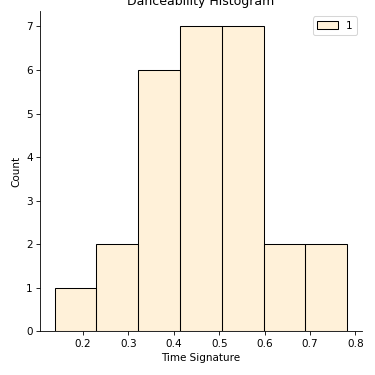

<IPython.core.display.Javascript object>


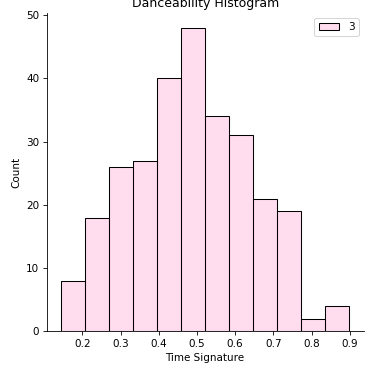

<IPython.core.display.Javascript object>


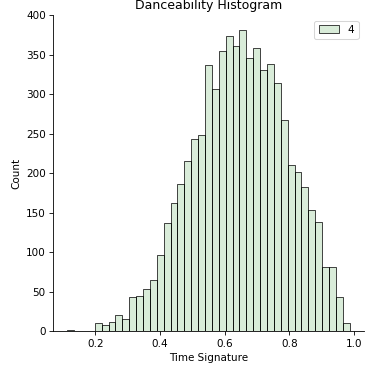

<IPython.core.display.Javascript object>


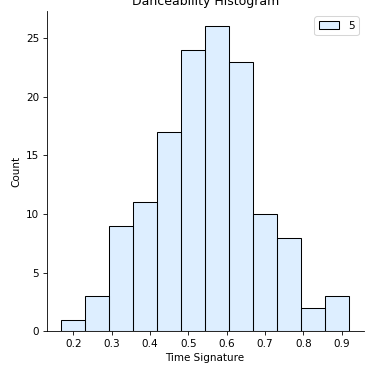

In [221]:

sns.displot(audio_features_df.loc[audio_features_df.Time_signature==1, "Danceability"],
            color="orange", label="1", alpha=0.15)
plt.title('Danceability Histogram')
plt.xlabel("Time Signature")
plt.legend()
sns.displot(audio_features_df.loc[audio_features_df.Time_signature==3, "Danceability"],
            color="deeppink", label="3", alpha=0.15)
plt.title('Danceability Histogram')
plt.xlabel("Time Signature")
plt.legend()
sns.displot(audio_features_df.loc[audio_features_df.Time_signature==4, "Danceability"],
            color="green", label="4", alpha=0.15)
plt.title('Danceability Histogram')
plt.xlabel("Time Signature")
plt.legend()
sns.displot(audio_features_df.loc[audio_features_df.Time_signature==5, "Danceability"],
            color="dodgerblue", label="5", alpha=0.15)

plt.title('Danceability Histogram')
plt.xlabel("Time Signature")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


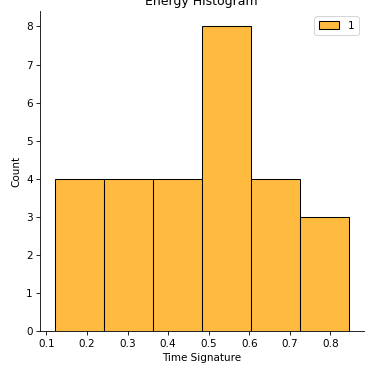

<IPython.core.display.Javascript object>


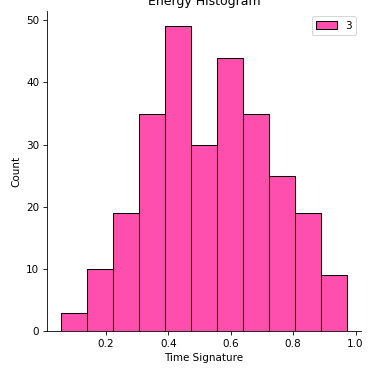

<IPython.core.display.Javascript object>


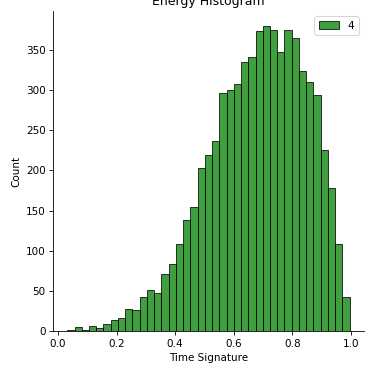

<IPython.core.display.Javascript object>


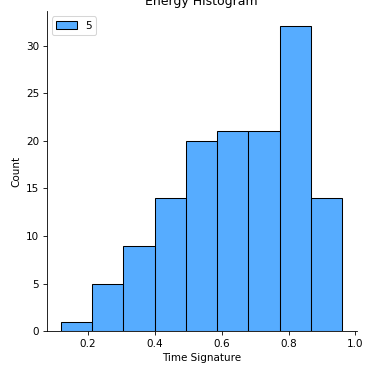

In [228]:

sns.displot(audio_features_df.loc[audio_features_df.Time_signature==1, "Energy"],
            color="orange", label="1")
plt.title('Energy Histogram')
plt.xlabel("Time Signature")
plt.legend()
sns.displot(audio_features_df.loc[audio_features_df.Time_signature==3, "Energy"],
            color="deeppink", label="3")
plt.title('Energy Histogram')
plt.xlabel("Time Signature")
plt.legend()
sns.displot(audio_features_df.loc[audio_features_df.Time_signature==4, "Energy"],
            color="green", label="4")
plt.title('Energy Histogram')
plt.xlabel("Time Signature")
plt.legend()
sns.displot(audio_features_df.loc[audio_features_df.Time_signature==5, "Energy"],
            color="dodgerblue", label="5")

plt.title('Energy Histogram')
plt.xlabel("Time Signature")
plt.legend()
plt.show()

## Word Cloud 

874183
There are 874183 words in the combination of all cells in column job title.


## Time Series

In [41]:
query = pd.read_csv("Resources/csv/Example_query_total_tracks.csv")
query

,Track_Id,track_name,total_weeks
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,90
1,4G8gkOterJn0Ywt6uhqbhp,Radioactive,87
2,7ueP5u2qkdZbIPN2YA6LR0,Sail,79
3,1LmZCslgfmzmifaWOrdzpJ,I'm Yours,76
4,6sy3LkhNFjJWlaeSMNwQ62,Counting Stars,68
...,...,...,...
4889,7GgzqbrToXcicwk4yBS1BN,Earth Intruders,1
4890,7gHXMSznrxRT2nZrYKMfDs,We Found Love,1
4891,7gHZGXSJzM29WA384suYY2,Secure The Bag,1
4892,7GmELLCacoDxgw74xfeUE4,Tell Me 'Bout It,1


In [42]:
query_1 = pd.read_csv("Resources/csv/Example_query_1.csv")
query_1

,track_name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Still Got Time,0.748,0.627,-6.029,1,0.0639,0.13100,0.000000,0.0852,0.524,120.963
1,Mr. Brightside,0.352,0.911,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033
2,I Kissed A Girl,0.699,0.760,-3.173,1,0.0677,0.00223,0.000000,0.1320,0.696,129.996
3,Unconditionally,0.432,0.725,-4.862,1,0.0431,0.00273,0.000000,0.2080,0.353,128.902
4,Wicked Games,0.606,0.570,-6.684,1,0.0320,0.02170,0.000008,0.3010,0.258,114.033
...,...,...,...,...,...,...,...,...,...,...,...
7181,Forever,0.575,0.591,-5.916,0,0.0280,0.01730,0.000000,0.1730,0.332,107.967
7182,Dolla Sign Slime,0.923,0.533,-6.016,0,0.2620,0.05040,0.000000,0.1020,0.587,133.991
7183,"Lions, Tigers & Bears",0.576,0.515,-6.178,1,0.0295,0.07880,0.000000,0.1180,0.407,95.406
7184,Cold Water,0.608,0.798,-5.092,0,0.0432,0.07360,0.000000,0.1560,0.501,92.943


In [183]:
query_3 = pd.read_csv("Resources/csv/Example_query_3.csv")
query_3

,decade,release_year,loudness
0,1940s,1942,-16.485
1,1940s,1945,-12.431
2,1940s,1947,-14.056
3,1940s,1947,-11.990
4,1950s,1957,-16.661
...,...,...,...
7181,Current Decade,2023,-5.567
7182,Current Decade,2023,-9.870
7183,Current Decade,2023,-4.010
7184,Current Decade,2023,-3.940


In [229]:
import plotly.express as px
# Group the data by decade and loudness, and calculate the average loudness for each year
grouped_df = query_3.groupby(['decade', 'release_year'], as_index=False)['loudness'].mean()

# Create an area line graph for each decade
fig = px.area(grouped_df, x='release_year', y='loudness', color='decade', line_group='decade')

# Update the chart layout
fig.update_layout(
    title='Loudness of Each Decade',
    xaxis_title='Release Year',
    yaxis_title='Loudness'
)

# Display the interactive chart
fig.show(renderer='iframe')


In [230]:
import ipywidgets as widgets
from IPython.display import display

# Create the dropdown widget
decade_dropdown = widgets.Dropdown(
    options=query_3.decade.unique(),
    value=query_3.decade.iloc[0],
    description='Select Decade:'
)

# Define the update function
def update_graph(selected_decade):
    # Filter the data based on the selected decade
    filtered_df = query_3[query_3.decade == selected_decade]
    
    # Create the histogram
    loud = px.histogram(filtered_df, x='loudness', nbins=20, title=f'Distribution of Loudness ({selected_decade})')
    loud.update_layout(xaxis_title='Loudness', yaxis_title='Count')
    
    # Show the chart
    loud.show(renderer='iframe')
    loud.write_html('Loudness.html')

# Call the update function when the dropdown value changes
widgets.interact(update_graph, selected_decade=decade_dropdown);


interactive(children=(Dropdown(description='Select Decade:', options=('1940s', '1950s', '1960s', '1970s', '198…

In [45]:
query_4 = pd.read_csv("Resources/csv/Example_query_4.csv")
query_4

,artist_name,followers,popularity,avg_stream
0,21.avage,14104401,90,115974
1,A.oogie.it.a.oodie,7526058,82,249276
2,Adele,49571312,84,11623
3,AJR,2954228,72,61528
4,Alan.alker,38484729,81,9360
...,...,...,...,...
211,Young Boy Never Broke Again,11335801,82,203323
212,Young Thug,8557164,86,208458
213,Young..A,1389874,58,253238
214,Zac.rown.and,3605319,73,232053


<IPython.core.display.Javascript object>


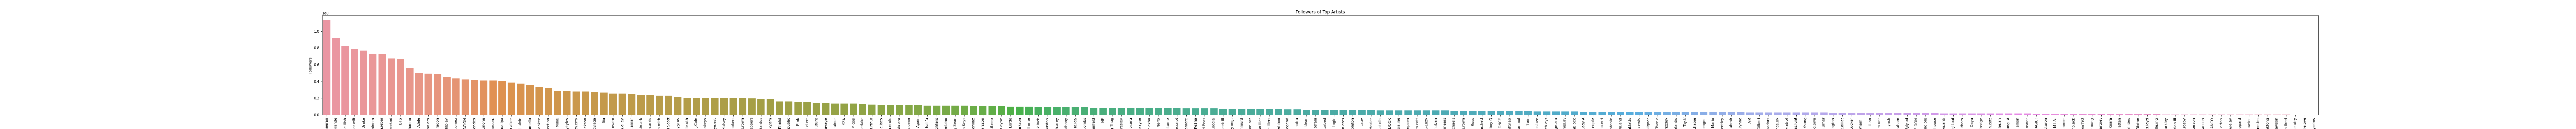

In [231]:

# Sort the DataFrame by followers in descending order
sorted_df = query_4.sort_values('followers', ascending=False)

# Create the bar chart using seaborn
plt.figure(figsize=(100, 5))
sns.barplot(data=sorted_df, x='artist_name', y='followers')
plt.xlabel('Artist')
plt.ylabel('Followers')
plt.title('Followers of Top Artists')
plt.xticks(rotation=90)
plt.show()
plt.savefig('Followers by Artists Bar Graph.jpg', format='jpeg')


<IPython.core.display.Javascript object>


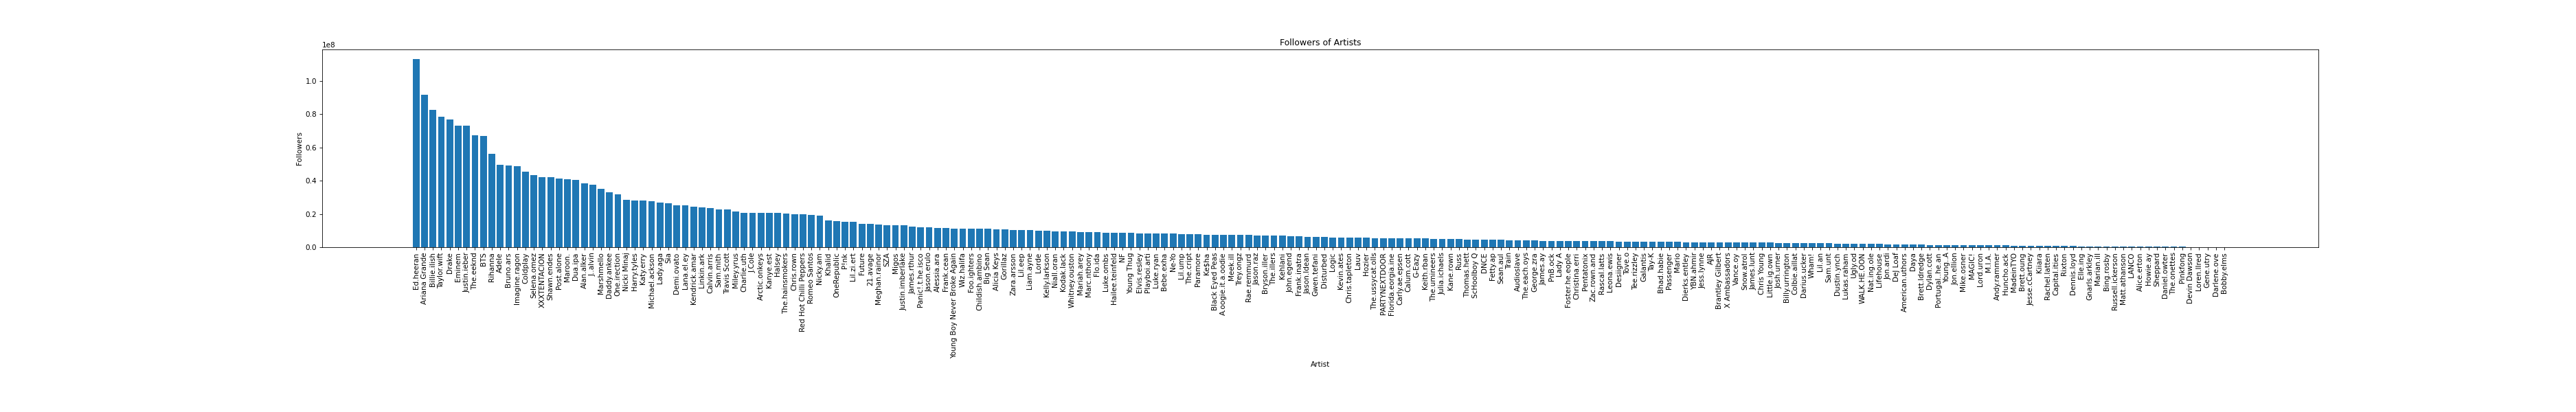

In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'query_4' with columns 'artist_name', 'followers', 'popularity', and 'no_of_streams'
# You can modify the code accordingly if your DataFrame has different column names

# Sort the DataFrame by followers in descending order
sorted_df = query_4.sort_values('followers', ascending=False)

# Create the bar chart
plt.figure(figsize=(50, 8))  # Increase the figsize to accommodate more artists

plt.bar(sorted_df['artist_name'], sorted_df['followers'])
plt.xlabel('Artist')
plt.ylabel('Followers')
plt.title('Followers of Artists')

plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)  # Adjust the bottom margin to make room for x-axis labels

plt.show()

plt.savefig('Followers by Artists Bar Graph(2).jpg', format='jpeg')


In [110]:
query_1

,track_name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Still Got Time,0.748,0.627,-6.029,1,0.0639,0.13100,0.000000,0.0852,0.524,120.963
1,Mr. Brightside,0.352,0.911,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033
2,I Kissed A Girl,0.699,0.760,-3.173,1,0.0677,0.00223,0.000000,0.1320,0.696,129.996
3,Unconditionally,0.432,0.725,-4.862,1,0.0431,0.00273,0.000000,0.2080,0.353,128.902
4,Wicked Games,0.606,0.570,-6.684,1,0.0320,0.02170,0.000008,0.3010,0.258,114.033
...,...,...,...,...,...,...,...,...,...,...,...
7181,Forever,0.575,0.591,-5.916,0,0.0280,0.01730,0.000000,0.1730,0.332,107.967
7182,Dolla Sign Slime,0.923,0.533,-6.016,0,0.2620,0.05040,0.000000,0.1020,0.587,133.991
7183,"Lions, Tigers & Bears",0.576,0.515,-6.178,1,0.0295,0.07880,0.000000,0.1180,0.407,95.406
7184,Cold Water,0.608,0.798,-5.092,0,0.0432,0.07360,0.000000,0.1560,0.501,92.943


In [112]:
testing = query_1[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]

<IPython.core.display.Javascript object>


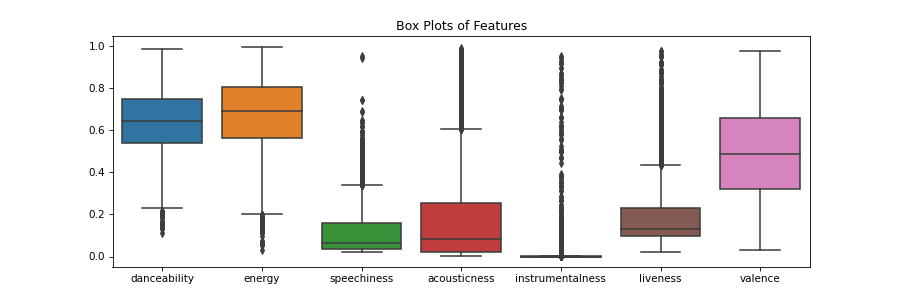

In [199]:

# Assuming you have a DataFrame named 'query_df' with the columns mentioned
# You can modify the code accordingly if your DataFrame has different column names

# Create a box plot for each column
plt.figure(figsize=(12,4))
sns.boxplot(data=testing)
plt.xticks(rotation=0)
plt.title('Box Plots of Features')
plt.show()

plt.savefig('Audio__features Box Plots.jpg', format='jpeg')
